<a href="https://colab.research.google.com/github/Ibad17/assignment/blob/main/DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:
Epoch 1/5-SGD Loss:1.087977
Epoch 2/5-SGD Loss:1.018945
Epoch 3/5-SGD Loss:1.002665
Epoch 4/5-SGD Loss:0.987768
Epoch 5/5-SGD Loss:0.977085

Training with Adam Optimizer:
Epoch 1/5-Adam Loss:1.050931
Epoch 2/5-Adam Loss:0.987256
Epoch 3/5-Adam Loss:0.961892
Epoch 4/5-Adam Loss:0.944389
Epoch 5/5-Adam Loss:0.930152


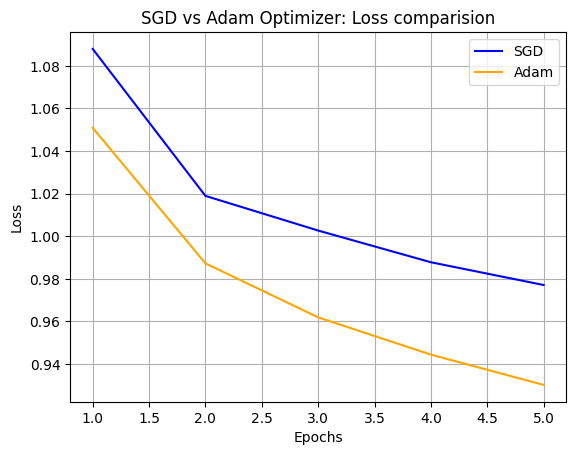

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X=np.random.randn(1000,10)
    y=np.random.randn(1000,1)
    return X,y

def create_model():
  model = models.Sequential([
      layers.Dense(50,activation='relu',input_shape=(10,)),
      layers.Dense(20,activation='relu'),
      layers.Dense(1)
  ])
  return model

def train_model(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  history=[]

  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}-{optimizer_name} Loss:{loss:4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()
optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.001)

epochs=5
batch_size=32

print("\nTraining with SGD Optimizer:")
sgd_loss=train_model(model_sgd,optimizer_sgd,X,y,batch_size,epochs,'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss=train_model(model_adam,optimizer_adam,X,y,batch_size,epochs,'Adam')
plt.plot(range(1,epochs+1),sgd_loss,label='SGD',color='blue')
plt.plot(range(1,epochs+1),adam_loss,label='Adam',color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss comparision')
plt.legend()
plt.grid(True)
plt.show()


Training with SGD Optimizer:
Epoch 1/5-SGD Loss:1.010882
Epoch 2/5-SGD Loss:0.991909
Epoch 3/5-SGD Loss:1.085677
Epoch 4/5-SGD Loss:0.969694
Epoch 5/5-SGD Loss:0.964899

Training with Adam Optimizer:
Epoch 1/5-Adam Loss:1.136937
Epoch 2/5-Adam Loss:0.948611
Epoch 3/5-Adam Loss:0.930811
Epoch 4/5-Adam Loss:0.920855
Epoch 5/5-Adam Loss:0.899712

Training with RMSprop Optimizer:
Epoch 1/5-RMSprop Loss:2.372339
Epoch 2/5-RMSprop Loss:0.949715
Epoch 3/5-RMSprop Loss:0.952792
Epoch 4/5-RMSprop Loss:0.949418
Epoch 5/5-RMSprop Loss:0.932158


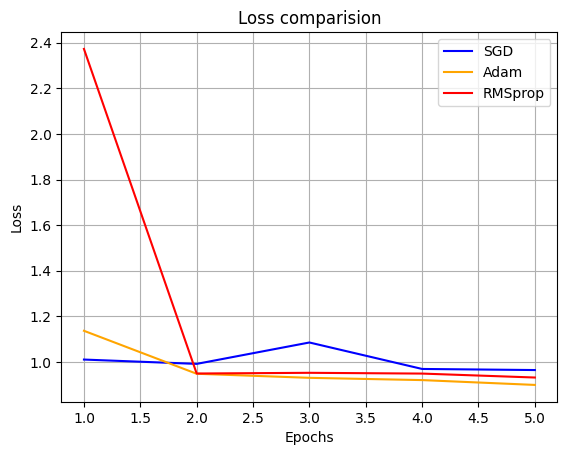

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers,models,optimizers

def create_data():
    X=np.random.randn(1000,10)
    y=np.random.randn(1000,1)
    return X,y

def create_model():
  model = models.Sequential([
      layers.Dense(200,activation='relu',input_shape=(10,)),
      layers.Dense(100,activation='tanh'),
      layers.Dense(50,activation='sigmoid'),
      layers.Dense(1)
  ])
  return model

def train_model(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  history=[]

  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}-{optimizer_name} Loss:{loss:4f}")
  return history

X,y = create_data()
model_sgd = create_model()
model_adam = create_model()
model_rmsprop = create_model()

optimizer_sgd = optimizers.SGD(learning_rate=0.05)
optimizer_adam = optimizers.Adam(learning_rate=0.001)
optimizer_rmsprop = optimizers.RMSprop(learning_rate=0.1)

epochs = 5
batch_size = 16

print("\nTraining with SGD Optimizer:")
sgd_loss = train_model(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss = train_model(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

print("\nTraining with RMSprop Optimizer:")
adaboost_loss = train_model(model_rmsprop, optimizer_rmsprop, X, y, batch_size, epochs, 'RMSprop')

plt.plot(range(1,epochs+1),sgd_loss,label='SGD',color='blue')
plt.plot(range(1,epochs+1),adam_loss,label='Adam',color='orange')
plt.plot(range(1,epochs+1),adaboost_loss,label='RMSprop',color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss comparision')
plt.legend()
plt.grid(True)
plt.show()